## IMPORT LIBRARY

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

## PRE - PROCESSING

In [120]:
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

In [121]:
data.tail()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [122]:
data2 = data[['Engine Size(L)','Cylinders','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']]
A = data['Engine Size(L)']
B = data['Cylinders']
C = data['Fuel Consumption (City (L/100 km)']
D = data['CO2 Emissions(g/km)']
data2.head(9)

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
0,2.4,4,9.9,200
1,3.5,6,12.6,263
2,2.0,4,11.0,232
3,2.0,4,11.3,242
4,2.0,4,11.2,230
5,2.0,4,11.3,231
6,3.0,6,12.3,256
7,3.0,6,12.3,261
8,2.0,4,10.0,205


In [123]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine Size(L)                     946 non-null    float64
 1   Cylinders                          946 non-null    int64  
 2   Fuel Consumption (City (L/100 km)  946 non-null    float64
 3   CO2 Emissions(g/km)                946 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 29.7 KB


In [124]:
data2.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
count,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,259.172304
std,1.374814,1.932670,3.452043,64.443149
min,1.200000,3.000000,4.000000,94.000000
25%,2.000000,4.000000,10.200000,213.250000
50%,3.000000,6.000000,12.200000,257.000000
75%,3.800000,6.000000,14.700000,300.750000
max,8.000000,16.000000,30.300000,608.000000


In [125]:
data['Engine Size(L)'] = data['Engine Size(L)'].astype('float')
data['Fuel Consumption (City (L/100 km)'] = data['Fuel Consumption (City (L/100 km)'].astype('float')

Text(0, 0.5, 'CO2 Emissions')

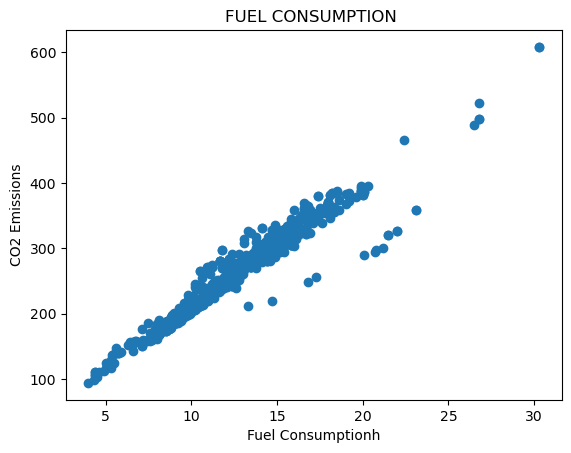

In [126]:
fig, ax = plt.subplots()


ax.scatter(data['Fuel Consumption (City (L/100 km)'], data['CO2 Emissions(g/km)'])

ax.set_title('FUEL CONSUMPTION ')
ax.set_xlabel('Fuel Consumptionh')
ax.set_ylabel('CO2 Emissions')

Text(0, 0.5, 'Engine Size')

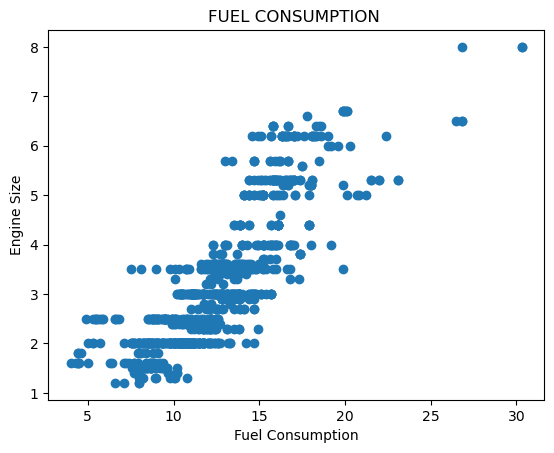

In [127]:
fig, ax = plt.subplots()


ax.scatter(data['Fuel Consumption (City (L/100 km)'], data['Engine Size(L)'])

ax.set_title('FUEL CONSUMPTION ')
ax.set_xlabel('Fuel Consumption')
ax.set_ylabel('Engine Size')

Text(0, 0.5, 'Cylinders')

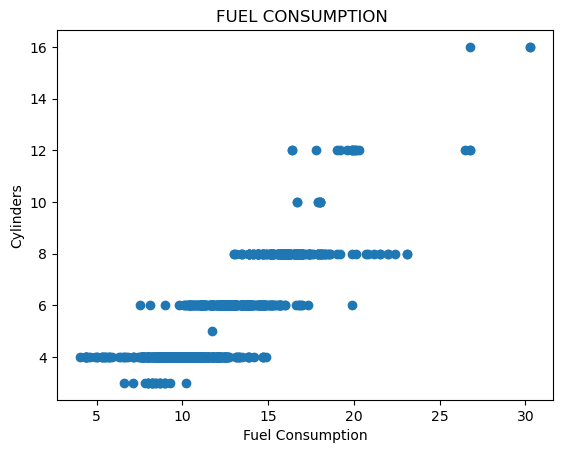

In [128]:
fig, ax = plt.subplots()


ax.scatter(data['Fuel Consumption (City (L/100 km)'], data['Cylinders'])

ax.set_title('FUEL CONSUMPTION ')
ax.set_xlabel('Fuel Consumption')
ax.set_ylabel('Cylinders')

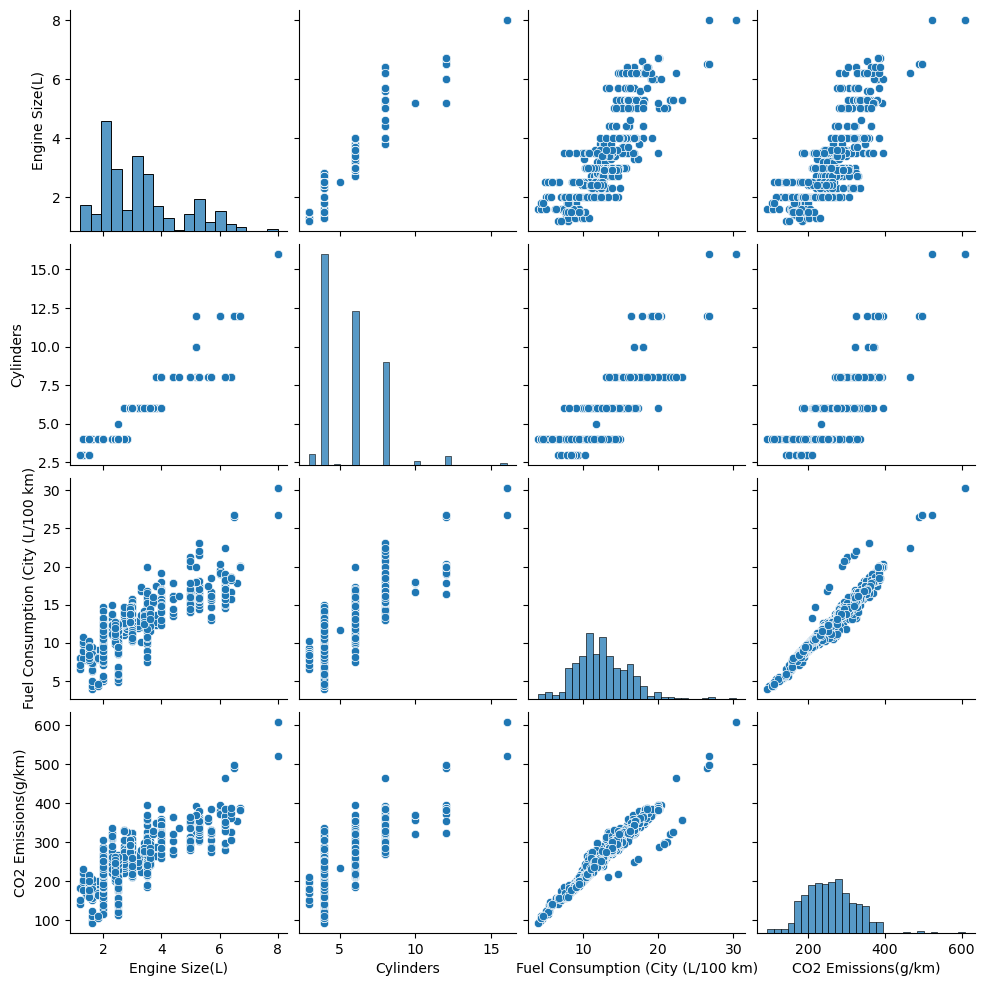

In [129]:
sns.pairplot(data2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14492\2985322191.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(data2, alpha=1, ax=ax)


array([[<Axes: xlabel='Engine Size(L)', ylabel='Engine Size(L)'>,
        <Axes: xlabel='Cylinders', ylabel='Engine Size(L)'>,
        <Axes: xlabel='Fuel Consumption (City (L/100 km)', ylabel='Engine Size(L)'>,
        <Axes: xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>],
       [<Axes: xlabel='Engine Size(L)', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Fuel Consumption (City (L/100 km)', ylabel='Cylinders'>,
        <Axes: xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>],
       [<Axes: xlabel='Engine Size(L)', ylabel='Fuel Consumption (City (L/100 km)'>,
        <Axes: xlabel='Cylinders', ylabel='Fuel Consumption (City (L/100 km)'>,
        <Axes: xlabel='Fuel Consumption (City (L/100 km)', ylabel='Fuel Consumption (City (L/100 km)'>,
        <Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption (City (L/100 km)'>],
       [<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>,
        <Axes: xlabel

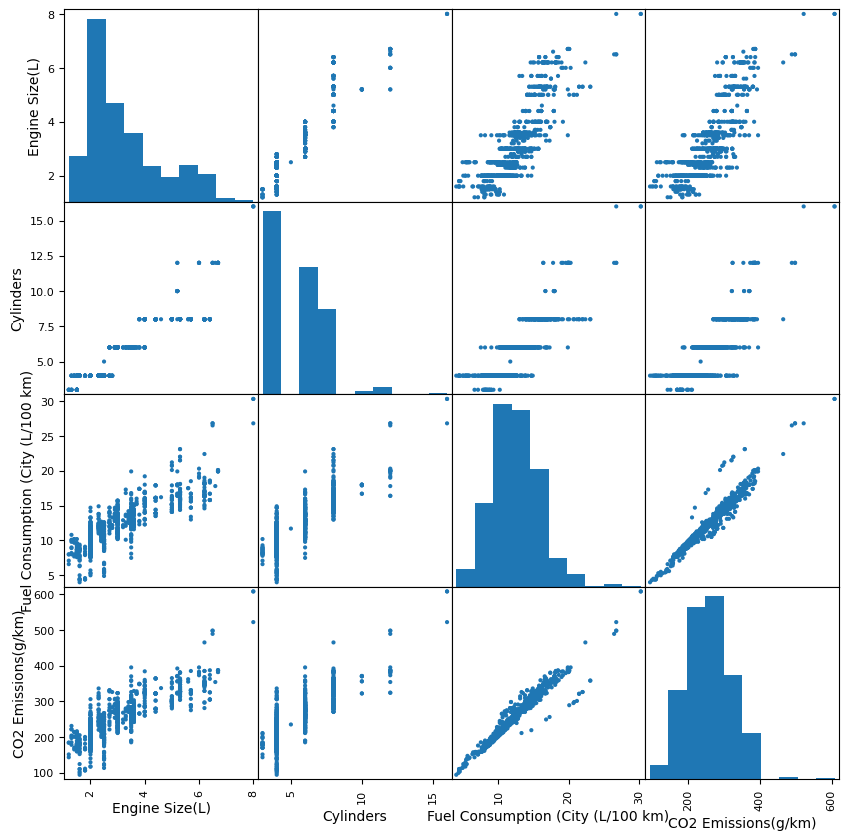

In [130]:
fig, ax = plt.subplots(figsize=(10,10))
scatter_matrix(data2, alpha=1, ax=ax)

## Mengetahui nilai korelasi antara variable dependent dan independent 

In [131]:
data2.corr().style.background_gradient().set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14492\2807415274.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data2.corr().style.background_gradient().set_precision(2)


,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.00,0.92,0.83,0.82
Cylinders,0.92,1.00,0.85,0.83
Fuel Consumption (City (L/100 km),0.83,0.85,1.00,0.97
CO2 Emissions(g/km),0.82,0.83,0.97,1.00


## Variabel terikat / dependent (y) Fuel Consumption 

In [132]:
x = data2.drop(columns='Fuel Consumption (City (L/100 km)')
y = data2['Fuel Consumption (City (L/100 km)']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [134]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [135]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(756, 3)
(756,)
(190, 3)
(190,)


In [136]:
print('Model Intercept : ', regr.intercept_)
print('Model coefisien ', regr.coef_)

Model Intercept :  -0.5960020403298802
Model coefisien  [0.12469831 0.18370551 0.0450277 ]


In [137]:
coef_dict = {
    'features':x.columns,
    'coef_value':regr.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,Engine Size(L),0.124698
1,Cylinders,0.183706
2,CO2 Emissions(g/km),0.045028


In [138]:
y_pred = regr.predict(x_test)
regr.score(x_test, y_test)

0.950844273569823

In [139]:
prediction = regr.predict(x_test)
prediction

array([ 8.46549626,  9.07856259, 12.40741698, 11.66246291, 13.51787305,
       22.58465175, 15.91638217, 16.91116165, 13.57494181, 10.06917198,
        7.38483148, 12.99277707, 13.29550114, 10.80693662, 13.53310947,
       16.25860077, 13.62316486,  4.57094104, 10.11419968,  7.79687084,
       16.76152367,  9.86135494, 13.89333106, 12.64545409, 13.98504273,
       12.81266628,  9.79900578, 15.0054434 , 12.81309505, 14.915388  ,
       17.01713499, 13.17288787,  7.83787505, 13.53310947, 15.9212338 ,
        6.54371347,  9.94932529,  7.90784241, 13.21029736, 12.57229137,
        8.5832579 ,  6.57433289, 14.9604157 , 15.74708493, 11.66246291,
        9.88906118, 11.43412906,  9.93408888, 13.03780477, 12.22730619,
       12.71222609, 11.42000295, 17.43693916, 15.63583119, 17.49652174,
       13.53310947, 14.37505561, 12.64017369, 14.01594433, 15.9212338 ,
        8.39829548, 18.69009654, 15.91638217, 11.69016915, 11.5969184 ,
        5.65645745,  9.88906118, 14.34845968, 10.42662699, 11.19

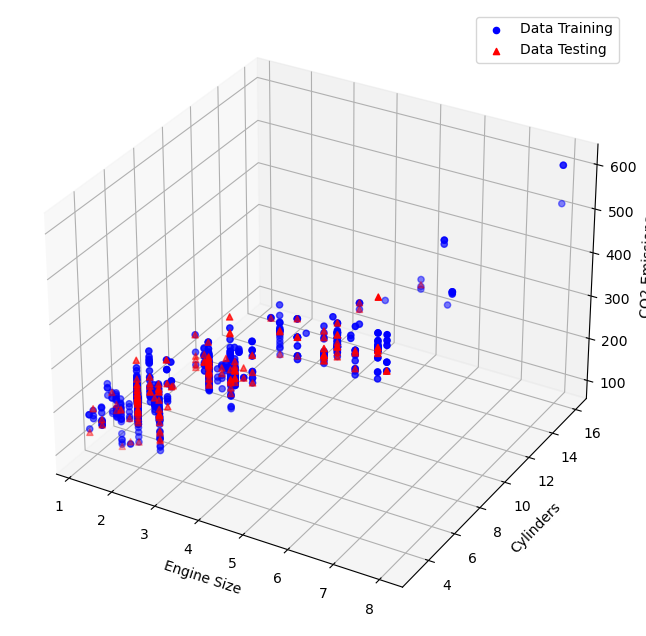

In [141]:
from mpl_toolkits.mplot3d import Axes3D

# Membuat plot scatter 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data training
ax.scatter(x_train['Engine Size(L)'], x_train['Cylinders'], x_train['CO2 Emissions(g/km)'], c='b', marker='o', label='Data Training')

# Data testing
ax.scatter(x_test['Engine Size(L)'], x_test['Cylinders'], x_test['CO2 Emissions(g/km)'], c='r', marker='^', label='Data Testing')

# Menambahkan label sumbu
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

plt.legend(loc='best')
plt.show()

## Modelling Variable Dependent (y) Engine Size

In [149]:
x = data[['Fuel Consumption (City (L/100 km)']]
print(x)

     Fuel Consumption (City (L/100 km)
0                                  9.9
1                                 12.6
2                                 11.0
3                                 11.3
4                                 11.2
..                                 ...
941                               10.7
942                               10.5
943                               11.0
944                               11.5
945                               12.4

[946 rows x 1 columns]


In [150]:
y = data['Engine Size(L)']
print(y)

0      2.4
1      3.5
2      2.0
3      2.0
4      2.0
      ... 
941    2.0
942    2.0
943    2.0
944    2.0
945    2.0
Name: Engine Size(L), Length: 946, dtype: float64


In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [152]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [153]:
print('Model Intercept : ', regr.intercept_)
print('Model coefisien ', regr.coef_)

Model Intercept :  -0.9283234676438763
Model coefisien  [0.32809542]


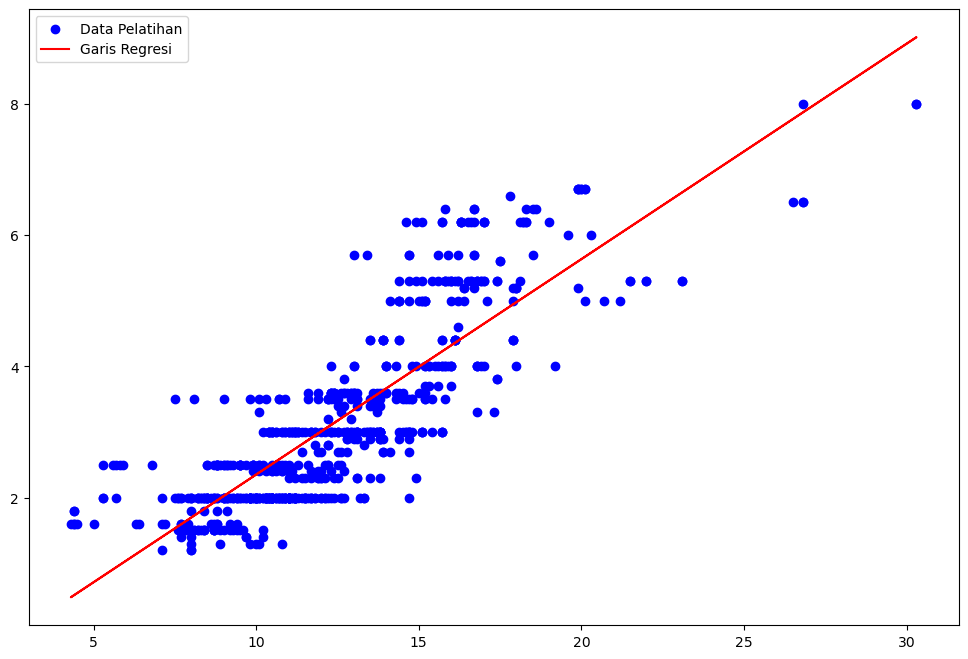

In [154]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, color='blue', label='Data Pelatihan')

plt.plot(x_train, regr.predict(x_train), color='red', label = 'Garis Regresi')
plt.legend()
plt.show()

In [155]:
y_pred = regr.predict(x_test)
regr.score(x_test, y_test)

0.6544321855982025